In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

Univariante Analysis

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

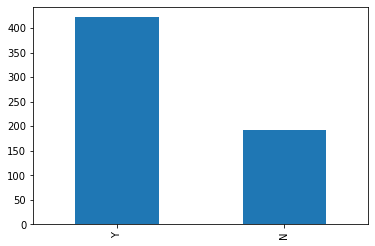

In [10]:
train['Loan_Status'].value_counts().plot.bar()

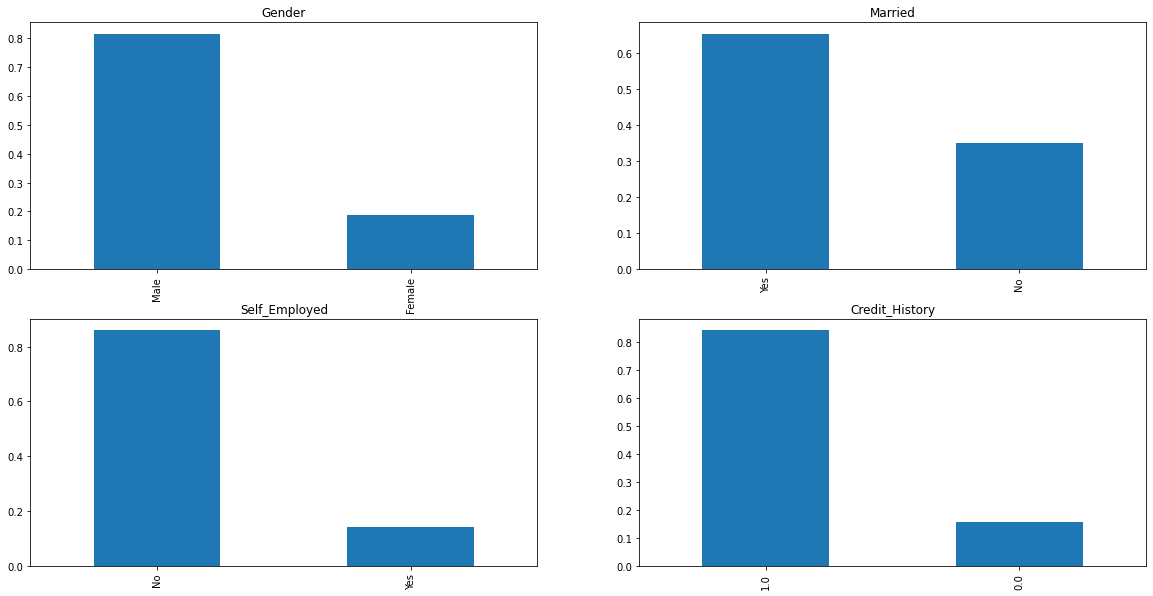

In [11]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()


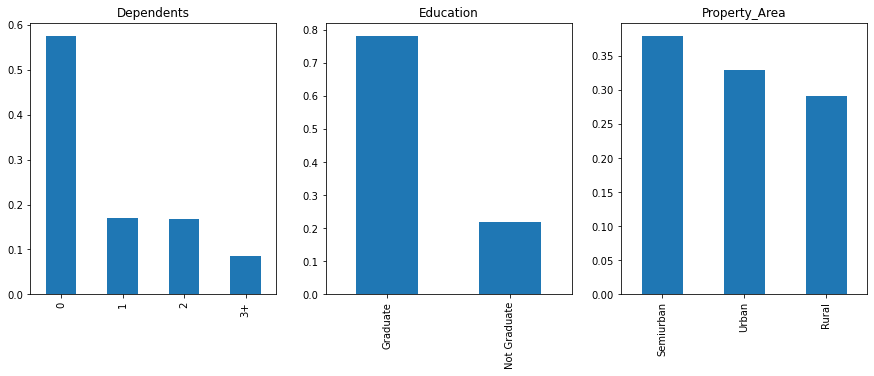

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (15,5), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

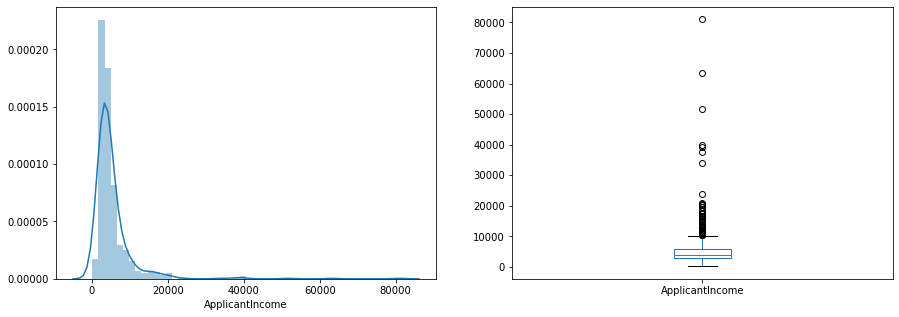

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (15,5))
plt.show()

Text(0.5, 0.98, '')

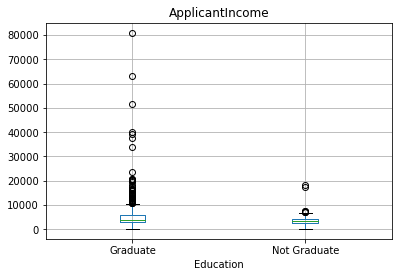

In [14]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

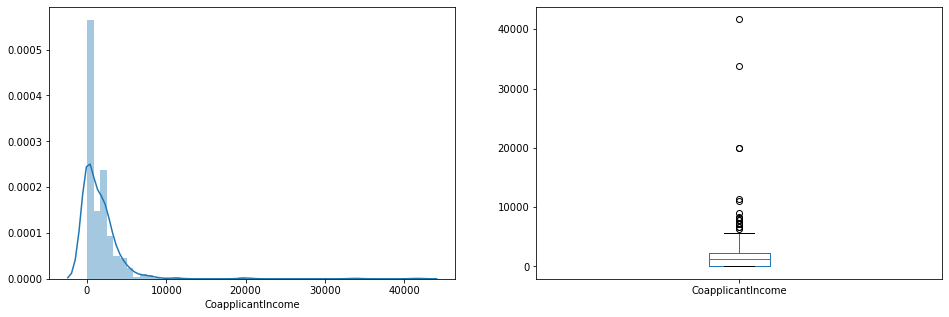

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

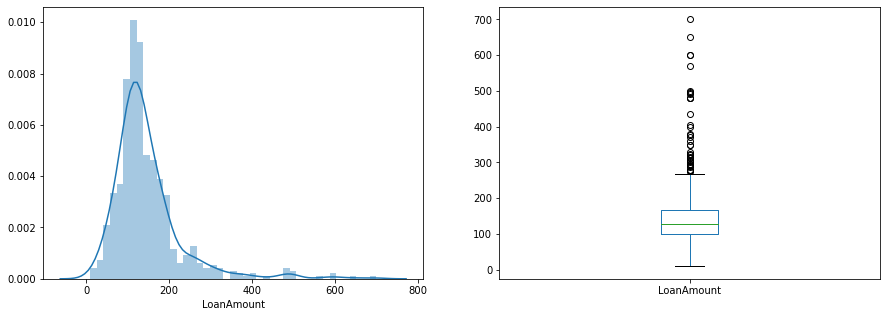

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (15,5))
plt.show()

BIVARIANTE ANALYSIS

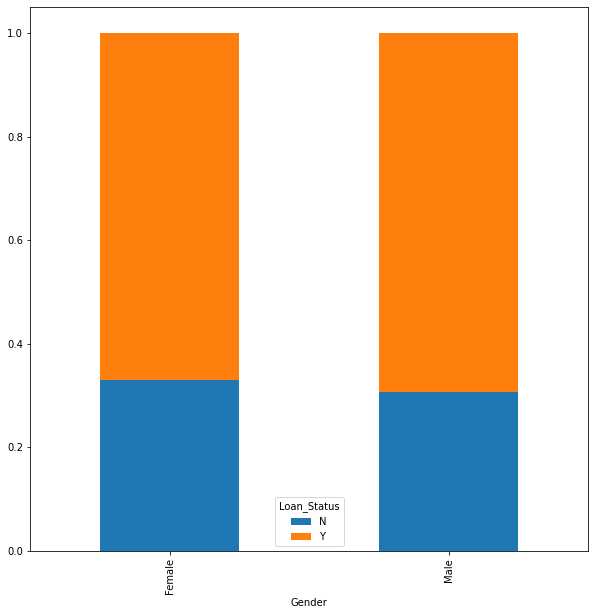

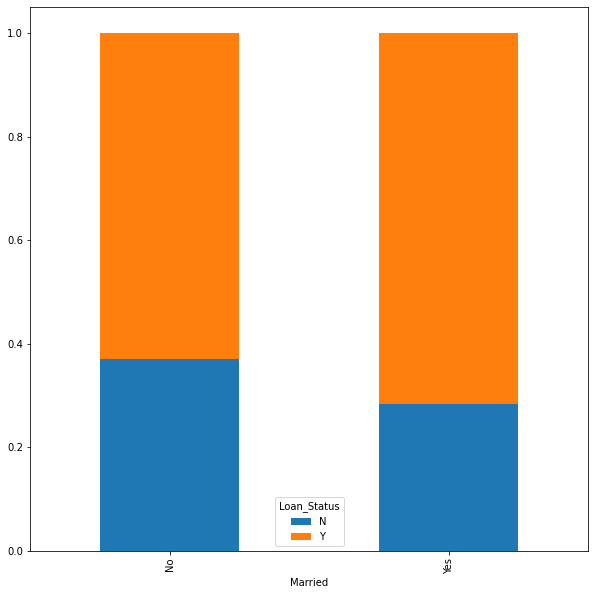

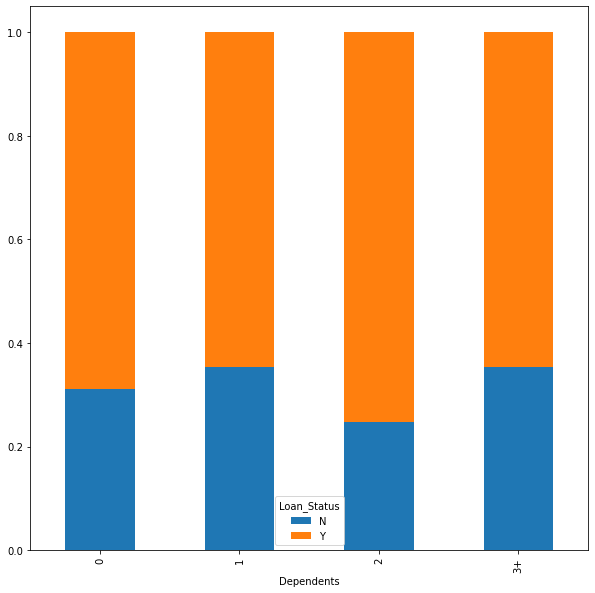

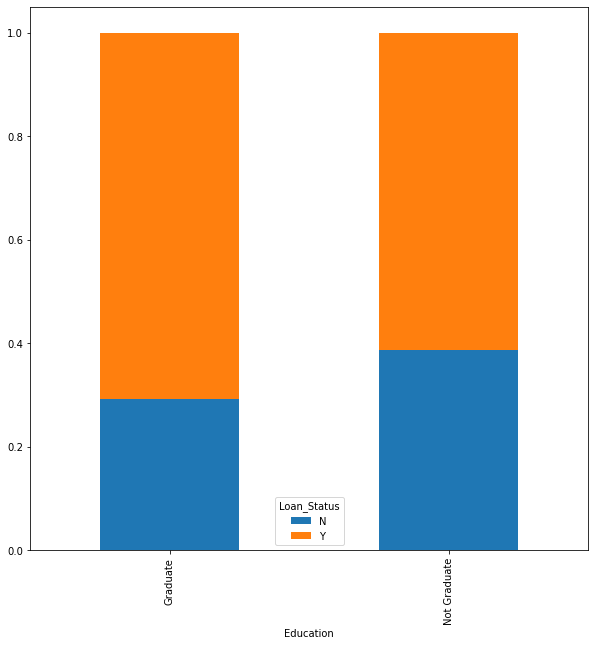

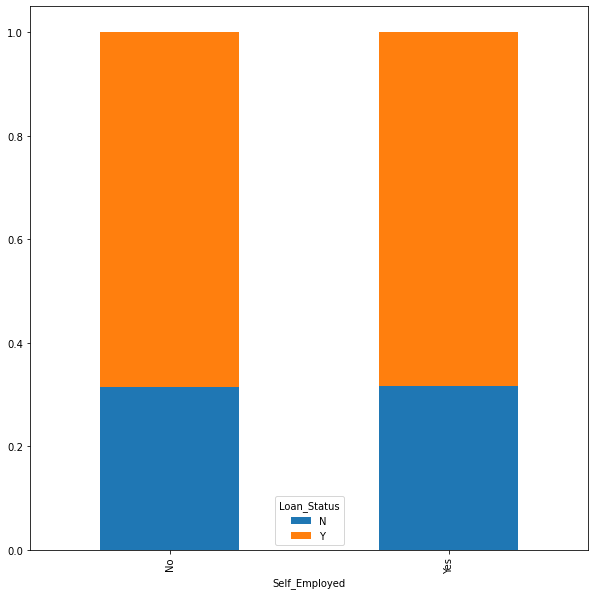

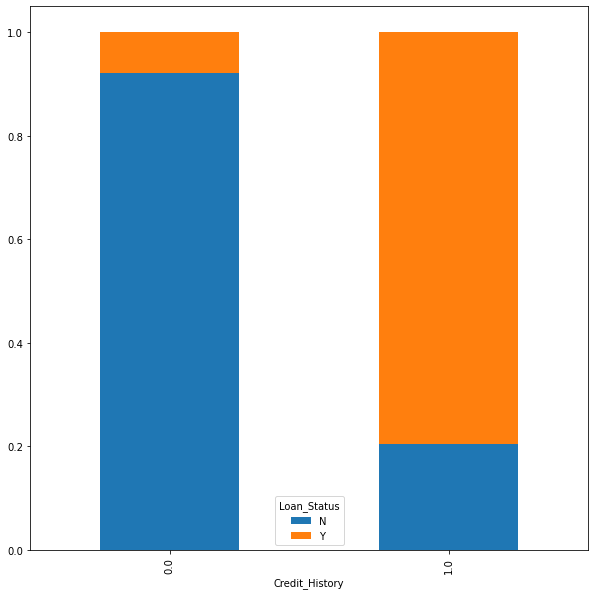

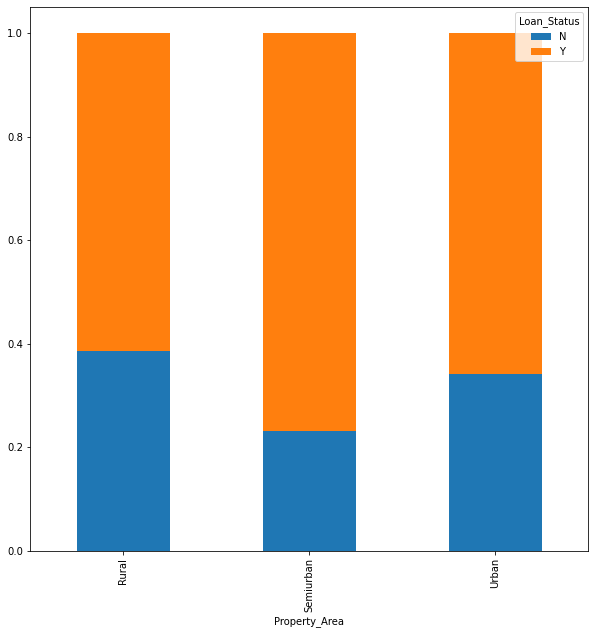

In [17]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))

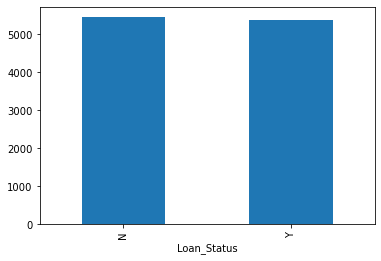

In [18]:
train.groupby(['Loan_Status'])['ApplicantIncome'].mean().plot(kind = "bar")

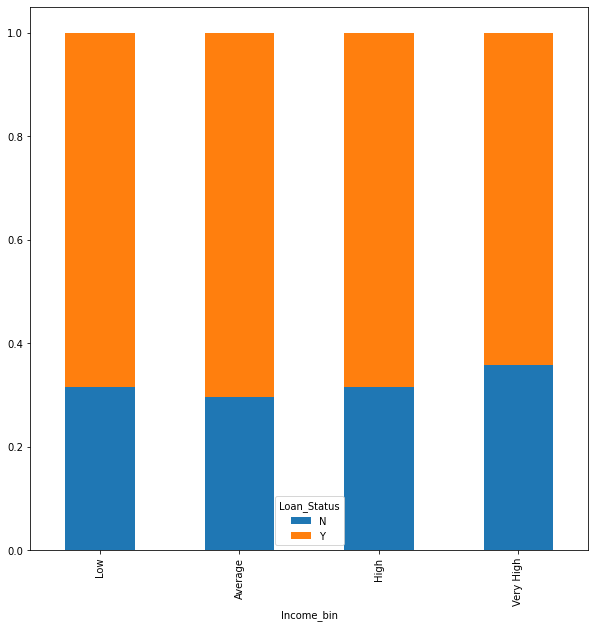

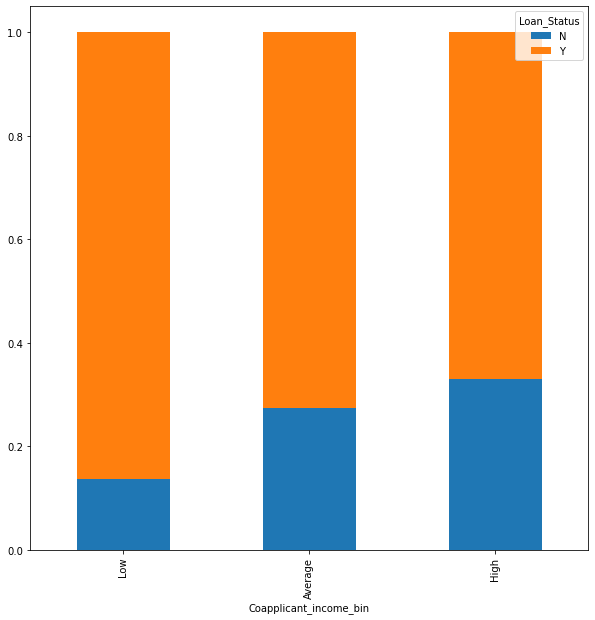

In [19]:
bins = [0, 2500, 4000, 6000, 8100]
group = ['Low', 'Average', 'High', 'Very High']
bins2 = [0, 1000, 3000, 42000]
group2 = ['Low', 'Average', 'High']

train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
train['Coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'], bins2, labels = group2)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Coapplicant_income_bin = pd.crosstab(train['Coapplicant_income_bin'], train['Loan_Status'])

Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (10,10))
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize = (10,10))

Text(0, 0.5, 'Percentage')

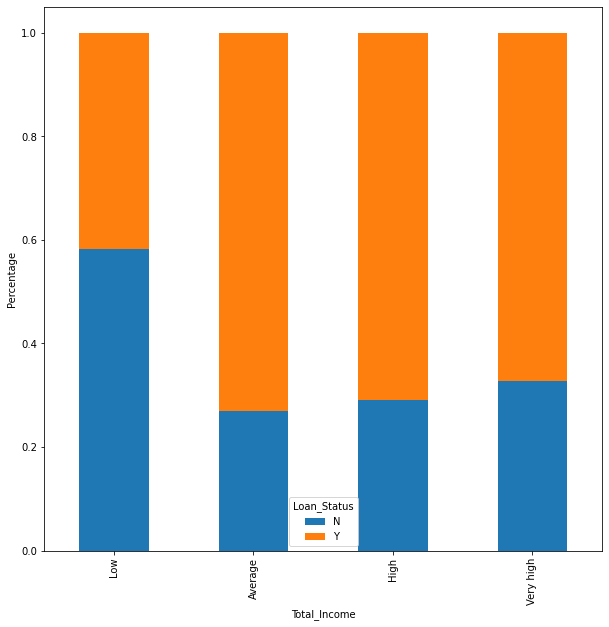

In [20]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

train['Total_income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)
Total_income_bin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize = (10,10))

plt.xlabel('Total_Income')
plt.ylabel('Percentage')

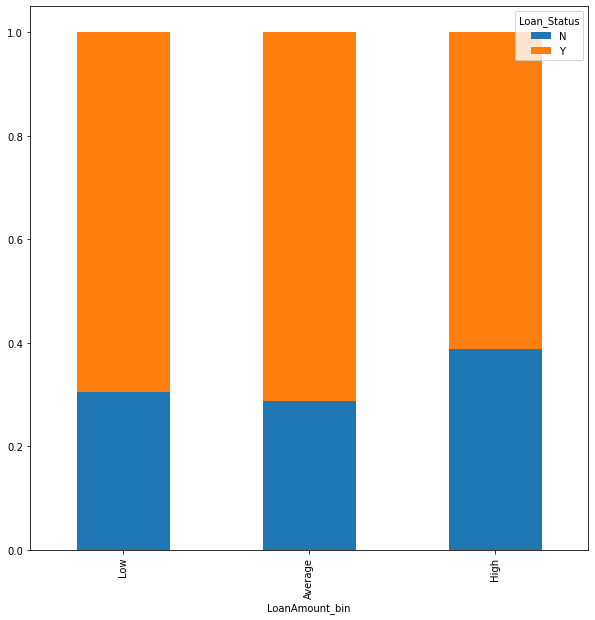

In [21]:
bins = [0, 100,200,700]
group = ['Low', 'Average', 'High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,10))

In [22]:
train = train.drop(['Income_bin', 'Coapplicant_income_bin', 'LoanAmount_bin', 'Total_income_bin', 'Total_Income'], axis = 1)

train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)

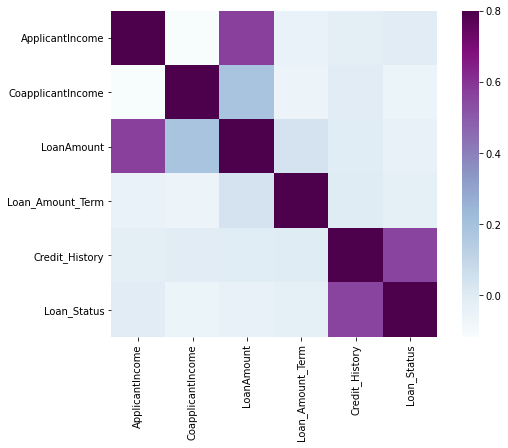

In [23]:
matrix = train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu")

MISSING VALUE AND OUTLINER TREATMENT

In [24]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)

In [26]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace = True)

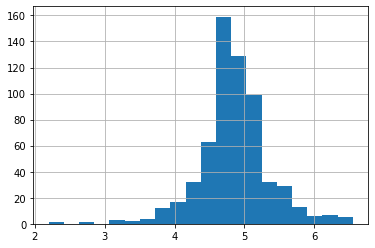

In [27]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

EVALUATION MATRIX FOR CLASSIFICATION PROBLEMS

MODEL BUILDING : PART I

In [28]:
train.drop(['Loan_ID'], axis = 1, inplace = True)
test.drop(['Loan_ID'], axis = 1, inplace = True)

In [29]:
x = train.drop(['Loan_Status'], 1)
y = train.Loan_Status

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

pred_cv = model.predict(x_cv)
pred_test = model.predict(test)

accuracy_score(y_cv, pred_cv)

0.827027027027027

In [32]:

submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status'] = pred_test

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

submission['Loan_ID'] = test_original['Loan_ID']

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("logistics.csv")

LOGISTICS REGRESSION USING STRATIFIED K - FOLD CROSS VALIDATION

In [33]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x,y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl ,pred_test)
    
    print('accuracy_score ', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy_score  0.8048780487804879

2 of kfold 5
accuracy_score  0.8292682926829268

3 of kfold 5
accuracy_score  0.7723577235772358

4 of kfold 5
accuracy_score  0.7886178861788617

5 of kfold 5
accuracy_score  0.7950819672131147


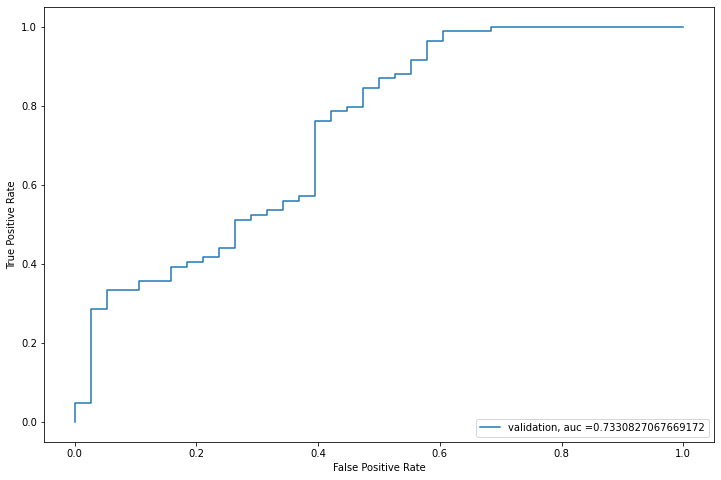

In [34]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label = "validation, auc ="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

In [35]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("logistics2.csv")

FEATURE ENGINEERING

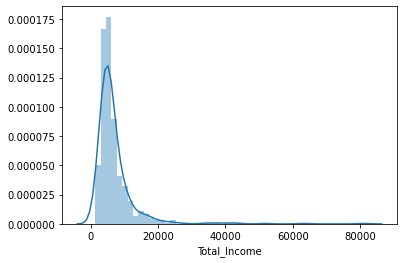

In [36]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

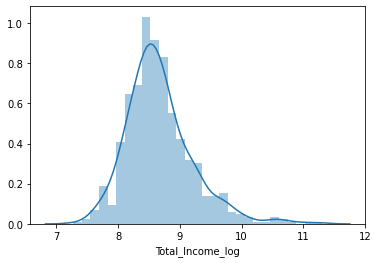

In [37]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

sns.distplot(train['Total_Income_log'])

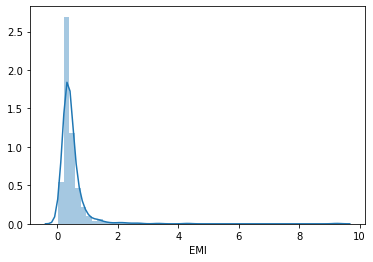

In [38]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

sns.distplot(train['EMI'])

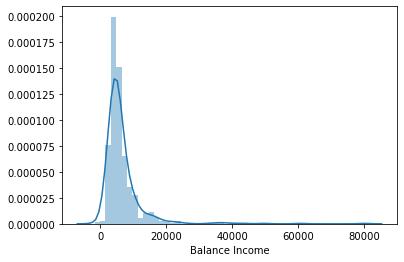

In [39]:
train['Balance Income'] = train['Total_Income'] - (train['EMI'] * 1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI'] * 1000)

sns.distplot(train['Balance Income'])

In [40]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)


MODEL BUILDING : PART II

In [41]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

LOGISTIC REGRESSION

In [42]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    
    print('accuracy_score ',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    


1 of kfold 5
accuracy_score  0.8130081300813008

2 of kfold 5
accuracy_score  0.7723577235772358

3 of kfold 5
accuracy_score  0.6666666666666666

4 of kfold 5
accuracy_score  0.7967479674796748

5 of kfold 5
accuracy_score  0.7868852459016393


In [43]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("log2.csv")

DECISION TREE

In [44]:
from sklearn import tree

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    
    print('accuracy_score ',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    


1 of kfold 5
accuracy_score  0.7560975609756098

2 of kfold 5
accuracy_score  0.6747967479674797

3 of kfold 5
accuracy_score  0.7479674796747967

4 of kfold 5
accuracy_score  0.7073170731707317

5 of kfold 5
accuracy_score  0.6721311475409836


In [45]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("Decision_Tree.csv")

RANDOM TREE

In [46]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(random_state = 1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    
    print('accuracy_score ',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    


1 of kfold 5
accuracy_score  0.8130081300813008

2 of kfold 5
accuracy_score  0.8211382113821138

3 of kfold 5
accuracy_score  0.7967479674796748

4 of kfold 5
accuracy_score  0.8130081300813008

5 of kfold 5
accuracy_score  0.7540983606557377


In [47]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("Random_Forest.csv")

IMPROVE RANDOM FOREST WITH GRID SEARCH

In [48]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : list(range(1, 20, 2)), 'n_estimators' : list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)


from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3, random_state = 1)
grid_search.fit(x_train, y_train)
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False), fit_params=None, iid=True, n_jobs=1, param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)
grid_search.best_estimator_RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)



TypeError: __init__() got an unexpected keyword argument 'fit_params'

In [ ]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(random_state = 1, max_depth = 3, n_estimators = 41)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    
    print('accuracy_score ',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

In [ ]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("GridSearchCV.csv")

In [ ]:
importances = pd.Series(model.feature_importances_, index = x.columns)
importances.plot(kind = 'barh', figsize = (12, 8))

XGBOOST

In [ ]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y) :
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = XGBClassifier(max_depth = 4, n_estimators = 50)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    
    print('accuracy_score ',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

In [ ]:
submission['Loan_Status'] =  pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("XBGClassifier.csv")